In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/My Drive/Project sem1/Datasets/Forest_and_Carbon.csv')

# Now you can work with the dataframe 'df'
print(df.head())

   ObjectId                       Country ISO2   ISO3  \
0         1            Advanced Economies  NaN  AETMP   
1         2            Advanced Economies  NaN  AETMP   
2         3            Advanced Economies  NaN  AETMP   
3         4            Advanced Economies  NaN  AETMP   
4         5  Afghanistan, Islamic Rep. of   AF    AFG   

                           Indicator            Unit  \
0           Carbon stocks in forests  Million tonnes   
1                        Forest area         1000 HA   
2  Index of carbon stocks in forests           Index   
3             Index of forest extent           Index   
4                        Forest area         1000 HA   

                                              Source CTS_Code  CTS_Name  \
0  Food and Agriculture Organization of the Unite...    ECMFC       NaN   
1  Food and Agriculture Organization of the Unite...    ECMFF       NaN   
2  Food and Agriculture Organization of the Unite...    ECMFS       NaN   
3  Food and Agricult

In [ ]:
df = df.drop('ISO2', axis=1)
df = df.drop('CTS_Name', axis=1)

print(df.head())

   ObjectId                       Country   ISO3  \
0         1            Advanced Economies  AETMP   
1         2            Advanced Economies  AETMP   
2         3            Advanced Economies  AETMP   
3         4            Advanced Economies  AETMP   
4         5  Afghanistan, Islamic Rep. of    AFG   

                           Indicator            Unit  \
0           Carbon stocks in forests  Million tonnes   
1                        Forest area         1000 HA   
2  Index of carbon stocks in forests           Index   
3             Index of forest extent           Index   
4                        Forest area         1000 HA   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...    ECMFC   
1  Food and Agriculture Organization of the Unite...    ECMFF   
2  Food and Agriculture Organization of the Unite...    ECMFS   
3  Food and Agriculture Organization of the Unite...    ECMFE   
4  Food and Agriculture O

In [ ]:
df.dtypes

,0
ObjectId,int64
Country,object
ISO3,object
Indicator,object
Unit,object
Source,object
CTS_Code,object
CTS_Full_Descriptor,object
F1992,float64
F1993,float64


In [ ]:
# Rename columns
new_columns = {}
for col in df.columns:
  if col.startswith('F') and col[1:].isdigit():
    new_columns[col] = col[1:]
df = df.rename(columns=new_columns)

print(df.head())
df.dtypes

   ObjectId                       Country   ISO3  \
0         1            Advanced Economies  AETMP   
1         2            Advanced Economies  AETMP   
2         3            Advanced Economies  AETMP   
3         4            Advanced Economies  AETMP   
4         5  Afghanistan, Islamic Rep. of    AFG   

                           Indicator            Unit  \
0           Carbon stocks in forests  Million tonnes   
1                        Forest area         1000 HA   
2  Index of carbon stocks in forests           Index   
3             Index of forest extent           Index   
4                        Forest area         1000 HA   

                                              Source CTS_Code  \
0  Food and Agriculture Organization of the Unite...    ECMFC   
1  Food and Agriculture Organization of the Unite...    ECMFF   
2  Food and Agriculture Organization of the Unite...    ECMFS   
3  Food and Agriculture Organization of the Unite...    ECMFE   
4  Food and Agriculture O

,0
ObjectId,int64
Country,object
ISO3,object
Indicator,object
Unit,object
Source,object
CTS_Code,object
CTS_Full_Descriptor,object
1992,float64
1993,float64


In [ ]:
# Find missing values where country is India and indicator is forest area
forest_area_india = df[(df['Country'] == 'India') & (df['Indicator'] == 'Forest area')].isnull().sum()
forest_area_india

,0
ObjectId,0
Country,0
ISO3,0
Indicator,0
Unit,0
Source,0
CTS_Code,0
CTS_Full_Descriptor,0
1992,0
1993,0


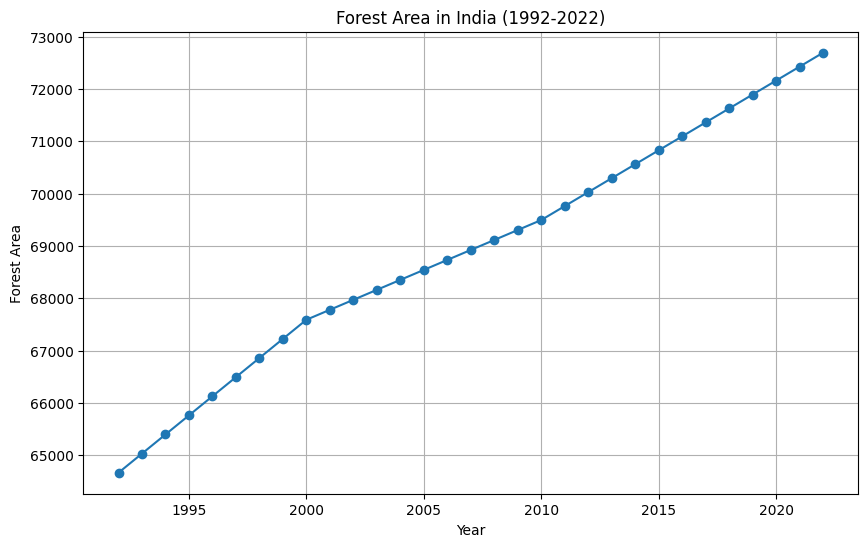

In [ ]:
import matplotlib.pyplot as plt
# Filter data for India and Forest Area
india_forest_data = df[(df['Country'] == 'India') & (df['Indicator'] == 'Forest area')]

# Extract years and forest area values
years = [int(col) for col in india_forest_data.columns if col.isdigit() and 1992 <= int(col) <= 2022]
forest_area = [india_forest_data[str(year)].iloc[0] for year in years]

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, forest_area, marker='o')
plt.xlabel('Year')
plt.ylabel('Forest Area')
plt.title('Forest Area in India (1992-2022)')
plt.grid(True)
plt.show()

In [ ]:
print(india_forest_data)

     ObjectId Country ISO3    Indicator     Unit  \
547       548   India  IND  Forest area  1000 HA   

                                                Source CTS_Code  \
547  Food and Agriculture Organization of the Unite...    ECMFF   

                                   CTS_Full_Descriptor     1992     1993  ...  \
547  Environment, Climate Change, Mitigation, Fores...  64668.6  65033.9  ...   

        2013     2014     2015     2016     2017     2018     2019     2020  \
547  70295.2  70561.6  70828.0  71094.4  71360.8  71627.2  71893.6  72160.0   

        2021     2022  
547  72426.4  72692.8  

[1 rows x 39 columns]


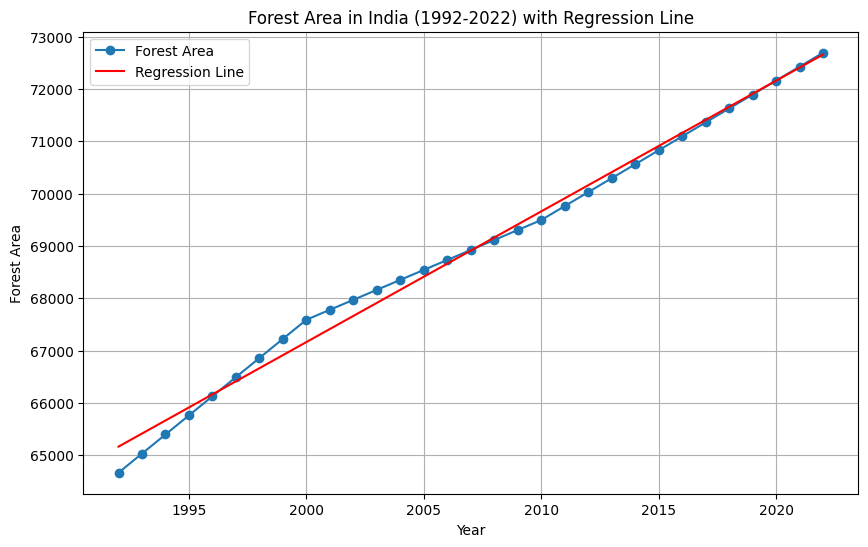

In [ ]:
import numpy as np
from scipy.stats import linregress

# Calculate linear regression
slope, intercept, r_value, p_value, std_err = linregress(years, forest_area)

# Create the plot
plt.figure(figsize=(10, 6))
plt.plot(years, forest_area, marker='o', label='Forest Area')

# Add regression line
plt.plot(years, intercept + slope * np.array(years), 'r', label='Regression Line')

plt.xlabel('Year')
plt.ylabel('Forest Area')
plt.title('Forest Area in India (1992-2022) with Regression Line')
plt.grid(True)
plt.legend()
plt.show()

In [ ]:

# Print the regression results
print(f"Slope: {slope}")
print(f"Intercept: {intercept}")
print(f"R-value: {r_value*100}%")
print(f"P-value: {p_value}")
print(f"Standard Error: {std_err}")

# R-squared value
r_squared = r_value**2
print(f"R-squared: {r_squared}")


# Summary of the linear regression
print("\nSummary of Linear Regression:")
print(f"The linear regression model shows a relationship between the year and forest area in India.")
print(f"The slope ({slope:.2f}) indicates the average annual change in forest area.")
print(f"A positive slope suggests an increasing trend, while a negative slope suggests a decreasing trend.")
print(f"The intercept ({intercept:.2f}) represents the estimated forest area at year 0 (not meaningful in this context).")
print(f"The R-squared value ({r_squared:.2f}) indicates the proportion of variance in forest area explained by the year.")
print(f"A higher R-squared value indicates a better fit of the model.")
print(f"The p-value ({p_value:.3f}) indicates the statistical significance of the relationship. A small p-value (usually < 0.05) suggests a statistically significant relationship.")


Slope: 249.69532258064515
Intercept: -432226.0317741935
R-value: 99.58763709339708%
P-value: 8.753224918248456e-32
Standard Error: 4.223889949234077
R-squared: 0.9917697461846157

Summary of Linear Regression:
The linear regression model shows a relationship between the year and forest area in India.
The slope (249.70) indicates the average annual change in forest area.
A positive slope suggests an increasing trend, while a negative slope suggests a decreasing trend.
The intercept (-432226.03) represents the estimated forest area at year 0 (not meaningful in this context).
The R-squared value (0.99) indicates the proportion of variance in forest area explained by the year.
A higher R-squared value indicates a better fit of the model.
The p-value (0.000) indicates the statistical significance of the relationship. A small p-value (usually < 0.05) suggests a statistically significant relationship.


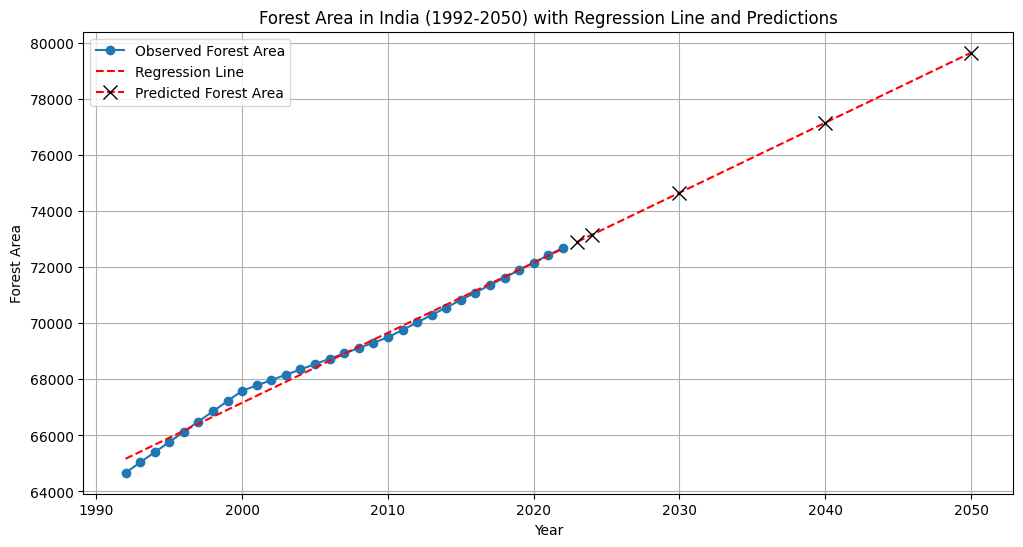

Predicted Forest Area for 2023: 72907.61
Predicted Forest Area for 2024: 73157.30
Predicted Forest Area for 2030: 74655.47
Predicted Forest Area for 2040: 77152.43
Predicted Forest Area for 2050: 79649.38


In [ ]:
# Predict forest area for future years
future_years = [2023, 2024, 2030, 2040, 2050]
predicted_forest_area = intercept + slope * np.array(future_years)

# Extend the plot with predicted values
plt.figure(figsize=(12, 6))
plt.plot(years, forest_area, marker='o', label='Observed Forest Area')
plt.plot(years, intercept + slope * np.array(years), 'r', label='Regression Line',linestyle='--')
plt.plot(future_years, predicted_forest_area, marker='x', linestyle='--', color='r', label='Predicted Forest Area',markeredgecolor='black',ms='10')


plt.xlabel('Year')
plt.ylabel('Forest Area')
plt.title('Forest Area in India (1992-2050) with Regression Line and Predictions')
plt.grid(True)
plt.legend()
plt.show()

# Print the predicted values
for year, area in zip(future_years, predicted_forest_area):
    print(f"Predicted Forest Area for {year}: {area:.2f}")

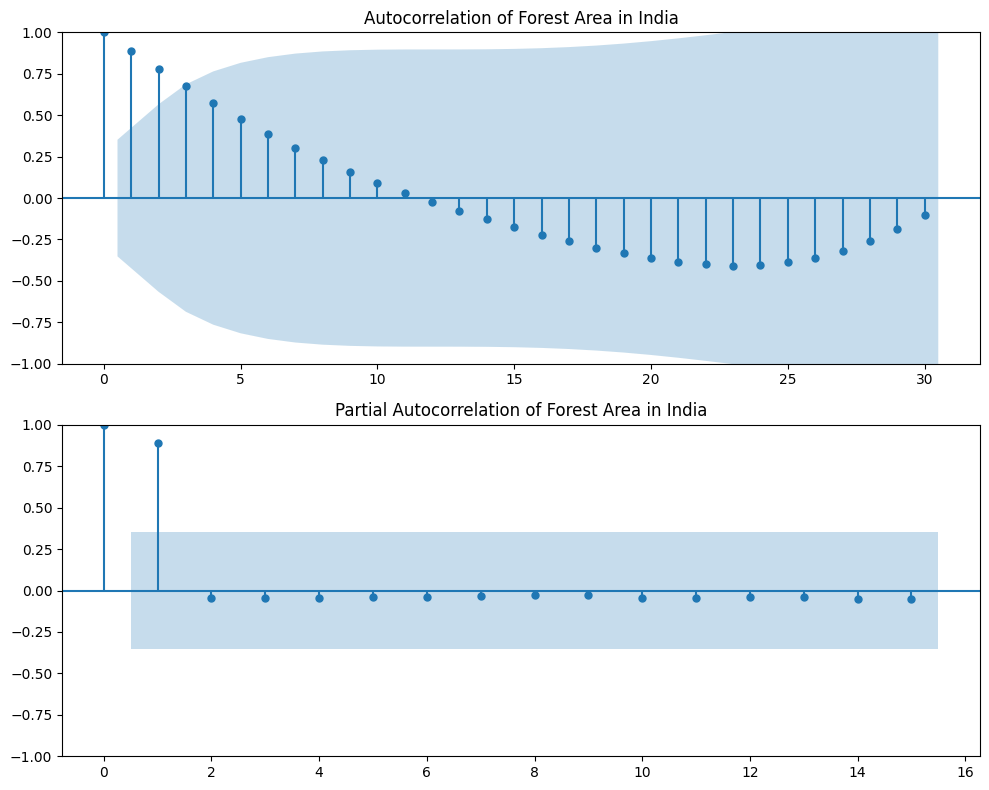

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

# Calculate autocorrelation and partial autocorrelation
acf_vals = np.correlate(forest_area, forest_area, mode='full')

# Plotting
fig, axes = plt.subplots(2, 1, figsize=(10, 8))

# Autocorrelation plot using statsmodels
plot_acf(forest_area, lags=len(years)-1, ax=axes[0])
axes[0].set_title('Autocorrelation of Forest Area in India')

# Partial autocorrelation plot using statsmodels
# Limit lags to 50% of the sample size
max_lags = len(years) // 2  # Calculate maximum allowed lags
plot_pacf(forest_area, lags=max_lags, ax=axes[1]) # Changed to calculate maximum lags
axes[1].set_title('Partial Autocorrelation of Forest Area in India')


plt.tight_layout()
plt.show()

In [ ]:
from statsmodels.tsa.stattools import adfuller

for d in range(3):
    if d > 0:
      differenced_series = np.diff(forest_area, n=d)
    else:
      differenced_series = forest_area

    result = adfuller(differenced_series)
    print(f"Results for d = {d}")
    print('ADF Statistic: %f' % result[0])
    print('p-value: %f' % result[1])
    print('Critical Values:')
    for key, value in result[4].items():
        print('\t%s: %.3f' % (key, value))

    if result[1] <= 0.05:
        print("Reject the null hypothesis. Time series is stationary.")
    else:
        print("Fail to reject the null hypothesis. Time series is not stationary.")
    print("-" * 50)

Results for d = 0
ADF Statistic: -0.102038
p-value: 0.949235
Critical Values:
	1%: -3.679
	5%: -2.968
	10%: -2.623
Fail to reject the null hypothesis. Time series is not stationary.
--------------------------------------------------
Results for d = 1
ADF Statistic: -5.346733
p-value: 0.000004
Critical Values:
	1%: -3.809
	5%: -3.022
	10%: -2.651
Reject the null hypothesis. Time series is stationary.
--------------------------------------------------
Results for d = 2
ADF Statistic: -5.749507
p-value: 0.000001
Critical Values:
	1%: -3.833
	5%: -3.031
	10%: -2.656
Reject the null hypothesis. Time series is stationary.
--------------------------------------------------


In [ ]:
!pip install pmdarima
from statsmodels.tsa.arima.model import ARIMA
import pmdarima as pm
# Automatic ARIMA model selection using pmdarima
auto_arima_model = pm.auto_arima(forest_area,
                                 start_p=0, start_q=0,
                                 test='adf',
                                 max_p=5, max_q=5, m=1, # Set appropriate max values
                                 d=None,           # Let auto_arima determine 'd'
                                 seasonal=False,   # No seasonality assumed in this example
                                 start_P=0,
                                 D=0,
                                 trace=True,
                                 error_action='ignore',
                                 suppress_warnings=True,
                                 stepwise=True)

print(auto_arima_model.summary())

# Access the p, d, and q values:
p, d, q = auto_arima_model.order
print(f"Optimal p, d, q values: p={p}, d={d}, q={q}")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 21.7 MB/s eta 0:00:00
Performing stepwise search to minimize aic
 ARIMA(0,2,0)(0,0,0)[0] intercept   : AIC=292.877, Time=0.07 sec
 ARIMA(1,2,0)(0,0,0)[0] intercept   : AIC=294.869, Time=0.05 sec
 ARIMA(0,2,1)(0,0,0)[0] intercept   : AIC=294.869, Time=0.56 sec
 ARIMA(0,2,0)(0,0,0)[0]             : AIC=291.147, Time=0.02 sec
 ARIMA(1,2,1)(0,0,0)[0] intercept   : AIC=296.856, Time=0.99 sec

Best model:  ARIMA(0,2,0)(0,0,0)[0]          
Total fit time: 1.720 seconds
                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                   31
Model:               SARIMAX(0, 2, 0)   Log Likelihood                -144.574
Date:                Sat, 14 Dec 2024   AIC                            291.147
Time:                        03:59:23   BIC                            292.514
Sample:                             0   HQIC                           291.575
    

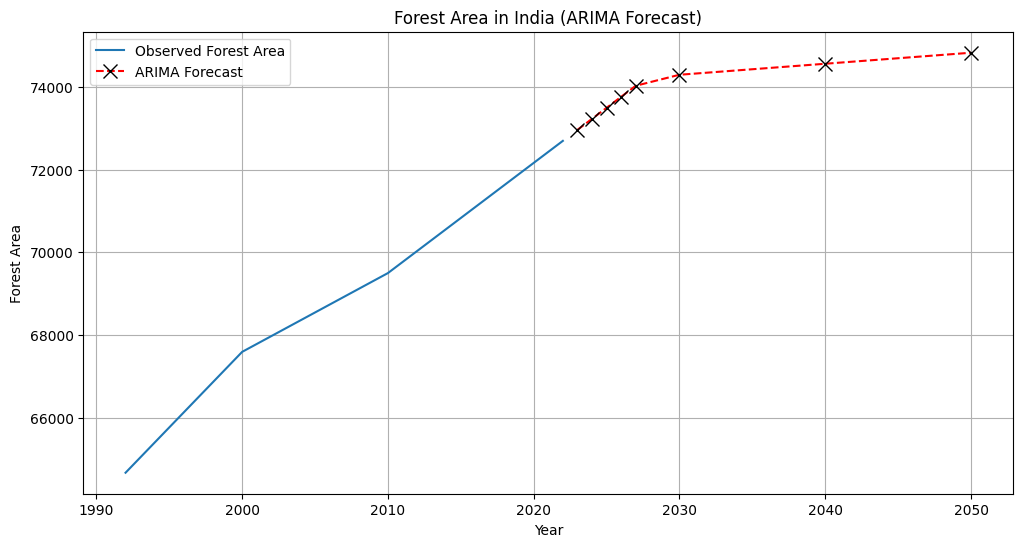

Forecasted Forest Area for 2023: 72959.20
Forecasted Forest Area for 2024: 73225.60
Forecasted Forest Area for 2025: 73492.00
Forecasted Forest Area for 2026: 73758.40
Forecasted Forest Area for 2027: 74024.80
Forecasted Forest Area for 2030: 74291.20
Forecasted Forest Area for 2040: 74557.60
Forecasted Forest Area for 2050: 74824.00


In [ ]:
model = ARIMA(forest_area, order=(0, 2, 0))
model_fit = model.fit()

# Forecast future values
future_years = [2023, 2024, 2025, 2026, 2027, 2030, 2040, 2050]
forecast = model_fit.predict(start=len(forest_area), end=len(forest_area) + len(future_years) -1)

# Plotting the forecast
plt.figure(figsize=(12, 6))
plt.plot(years, forest_area, label='Observed Forest Area')
plt.plot(future_years, forecast, label='ARIMA Forecast', marker='x', linestyle='--', color='r', markeredgecolor='black',ms='10')

plt.xlabel('Year')
plt.ylabel('Forest Area')
plt.title('Forest Area in India (ARIMA Forecast)')
plt.legend()
plt.grid(True)
plt.show()

# Print the forecasted values
for year, area in zip(future_years, forecast):
    print(f"Forecasted Forest Area for {year}: {area:.2f}")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense


# Data scaling
scaler = MinMaxScaler()
forest_area_scaled = scaler.fit_transform(np.array(forest_area).reshape(-1, 1))

# Prepare data for LSTM
def create_dataset(dataset, look_back=1):
    X, Y = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        X.append(a)
        Y.append(dataset[i + look_back, 0])
    return np.array(X), np.array(Y)

look_back = 5
X, Y = create_dataset(forest_area_scaled, look_back)
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

# LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 1)))
model.add(LSTM(units=50))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X, Y, epochs=100, batch_size=1, verbose=2)

# Predictions
future_years = [2023, 2024, 2025, 2026, 2027, 2030, 2040, 2050]
inputs = forest_area_scaled[-look_back:]
predictions = []

for i in range(len(future_years)):
    input_reshaped = np.reshape(inputs, (1, look_back, 1))
    prediction = model.predict(input_reshaped, verbose=0)
    predictions.append(prediction[0,0])
    inputs = np.append(inputs[1:], prediction)

# Inverse transform to get actual values
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))



/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/100
25/25 - 10s - 397ms/step - loss: 0.1434
Epoch 2/100
25/25 - 0s - 13ms/step - loss: 0.0129
Epoch 3/100
25/25 - 1s - 24ms/step - loss: 0.0026
Epoch 4/100
25/25 - 0s - 9ms/step - loss: 0.0010
Epoch 5/100
25/25 - 0s - 15ms/step - loss: 8.2774e-04
Epoch 6/100
25/25 - 0s - 14ms/step - loss: 8.0157e-04
Epoch 7/100
25/25 - 0s - 10ms/step - loss: 4.6154e-04
Epoch 8/100
25/25 - 0s - 11ms/step - loss: 3.4955e-04
Epoch 9/100
25/25 - 0s - 16ms/step - loss: 3.4022e-04
Epoch 10/100
25/25 - 1s - 22ms/step - loss: 4.0881e-04
Epoch 11/100
25/25 - 0s - 13ms/step - loss: 3.7897e-04
Epoch 12/100
25/25 - 0s - 10ms/step - loss: 4.5805e-04
Epoch 13/100
25/25 - 0s - 8ms/step - loss: 6.0975e-04
Epoch 14/100
25/25 - 0s - 6ms/step - loss: 0.0013
Epoch 15/100
25/25 - 0s - 5ms/step - loss: 4.7479e-04
Epoch 16/100
25/25 - 0s - 4ms/step - loss: 4.5656e-04
Epoch 17/100
25/25 - 0s - 7ms/step - loss: 3.1635e-04
Epoch 18/100
25/25 - 0s - 5ms/step - loss: 3.1103e-04
Epoch 19/100
25/25 - 0s - 5ms/step - loss: 3

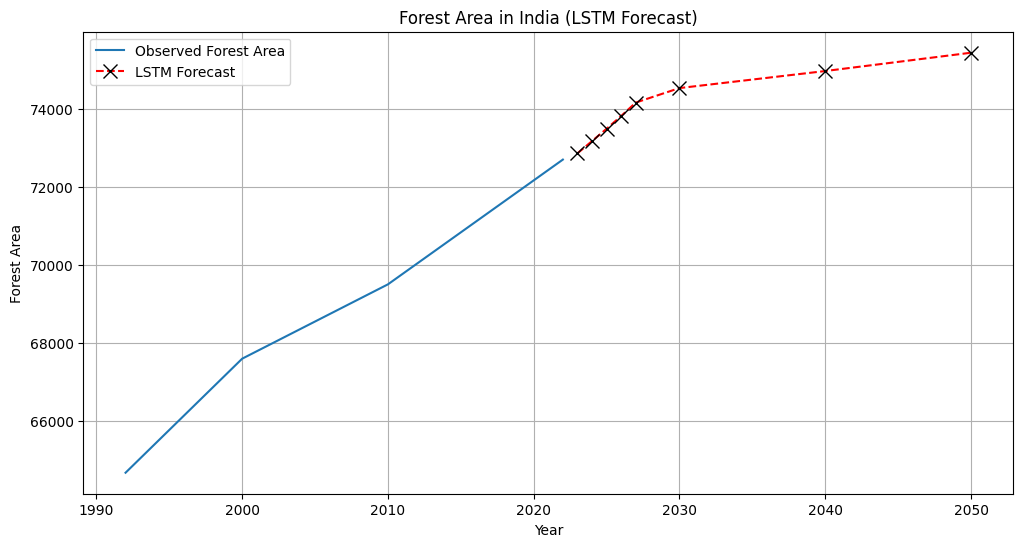

Forecasted Forest Area for 2023: 72853.39
Forecasted Forest Area for 2024: 73167.20
Forecasted Forest Area for 2025: 73483.06
Forecasted Forest Area for 2026: 73809.36
Forecasted Forest Area for 2027: 74154.13
Forecasted Forest Area for 2030: 74525.78
Forecasted Forest Area for 2040: 74962.31
Forecasted Forest Area for 2050: 75431.69


In [ ]:
# Plotting
plt.figure(figsize=(12, 6))
plt.plot(years, forest_area, label='Observed Forest Area')
plt.plot(future_years, predictions, label='LSTM Forecast', marker='x', linestyle='--', color='r', markeredgecolor='black',ms='10')

plt.xlabel('Year')
plt.ylabel('Forest Area')
plt.title('Forest Area in India (LSTM Forecast)')
plt.legend()
plt.grid(True)
plt.show()

# Print predictions
for year, area in zip(future_years, predictions):
    print(f"Forecasted Forest Area for {year}: {area[0]:.2f}")

In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 5, 50)               │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 91,955 (359.20 KB)

 Trainable params: 30,651 (119.73 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 61,304 (239.47 KB)